In [1]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib as mpl
mpl.rcParams['hatch.linewidth'] = 0.2
import numpy as np
import pandas as pd
import pickle
from tqdm.notebook import tqdm
import polars as pl

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.signal_categories import topological_category_labels, topological_category_colors, topological_category_labels_latex, topological_category_hatches, topological_categories_dic
from src.signal_categories import filetype_category_labels, filetype_category_colors, filetype_category_hatches
from src.signal_categories import del1g_detailed_category_labels, del1g_detailed_category_colors, del1g_detailed_category_labels_latex, del1g_detailed_category_hatches, del1g_detailed_categories_dic
from src.signal_categories import del1g_simple_category_labels, del1g_simple_category_colors, del1g_simple_category_labels_latex, del1g_simple_category_hatches, del1g_simple_categories_dic
from src.signal_categories import train_category_labels, train_category_labels_latex

from src.ntuple_variables.pandora_variables import pandora_scalar_second_half_training_vars

from src.file_locations import intermediate_files_location

from src.plot_helpers import make_plot

from src.ntuple_variables.variables import combined_training_vars

from src.systematics import get_significance_from_p_value


In [2]:
training = "all_vars"

reco_categories = train_category_labels
reco_category_labels_latex = train_category_labels_latex


In [3]:
print("loading all_df.parquet...")
all_df = pl.read_parquet(f"{intermediate_files_location}/presel_df_train_vars.parquet")
print(f"{all_df.shape=}")


loading all_df.parquet...
all_df.shape=(2339566, 1093)


In [4]:
print("loading presel_weights_df.parquet...")
presel_weights_df = pl.read_parquet(f"{intermediate_files_location}/presel_weights_df.parquet")
print(f"{presel_weights_df.shape=}")

loading presel_weights_df.parquet...
presel_weights_df.shape=(1911145, 28)


In [5]:
pred_df = all_df.filter(
    ~pl.col("filetype").is_in(["data", "isotropic_one_gamma_overlay", "delete_one_gamma_overlay"])
)
data_df = all_df.filter(
    pl.col("filetype") == "data"
)


including overflow
display_bins: [   0.  100.  200.  300.  400.  500.  600.  700.  800.  900. 1000. 1100.
 1200. 1300. 1400. 1500. 1600. 1700. 1800. 1900. 2000. 2100.]
creating systematic covariance matrices...
merging mc_pred_df and weights_df...
getting CV histogram and non-GENIE weights...


Creating reinteraction universe histograms: 100%|██████████| 1000/1000 [00:30<00:00, 33.01it/s]
Creating AxFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 105.41it/s]
Creating RPA_CCQE_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 120.86it/s]
Creating ThetaDelta2NRad_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 122.09it/s]
Creating Theta_Delta2Npi_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 129.91it/s]
Creating VecFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 109.73it/s]
Creating XSecShape_CCMEC_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 128.72it/s]
Creating xsr_scc_Fv3_SCC universe histograms: 100%|██████████| 10/10 [00:00<00:00, 70.24it/s]


done getting reweightable systematic covariance matrices


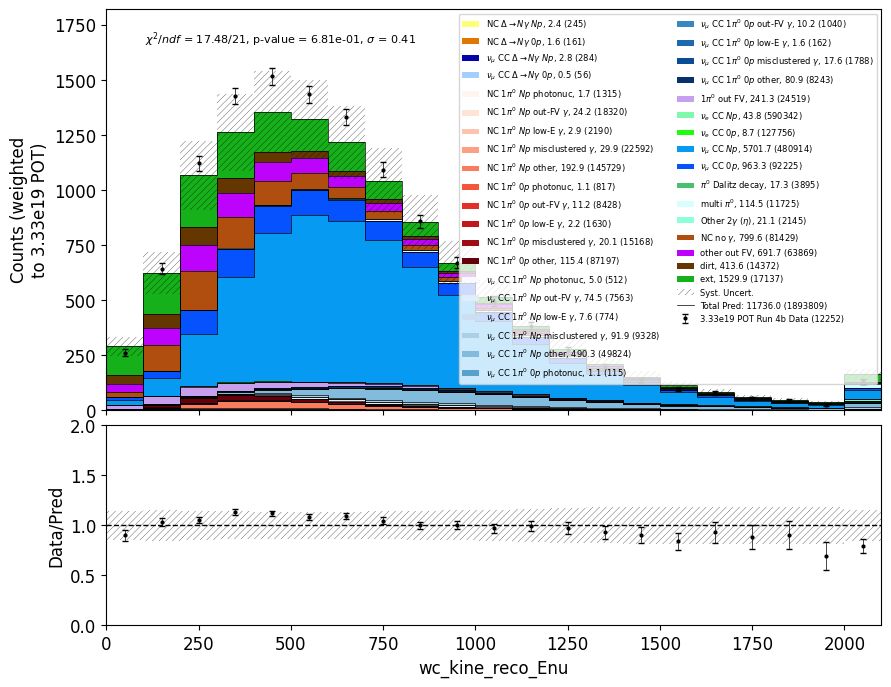

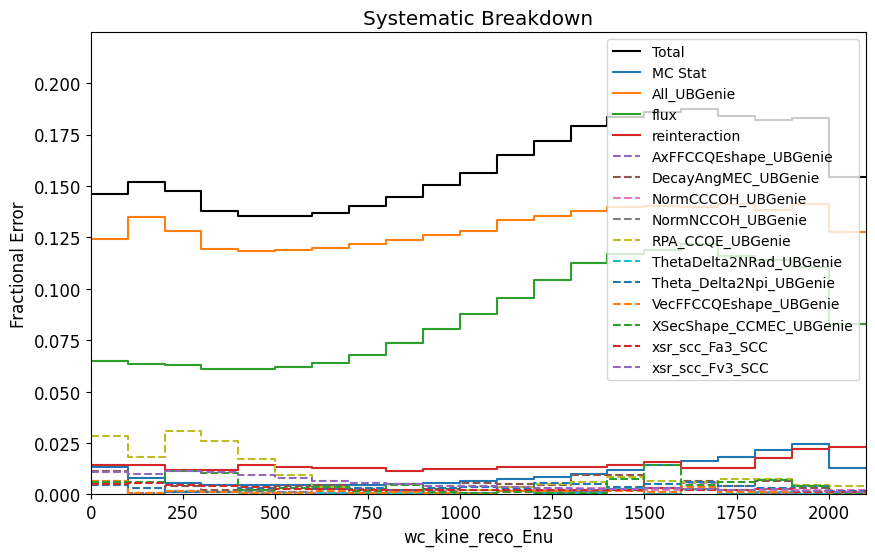

In [12]:
# hack to plot the legends without anything behind it
make_plot(pred_sel_df=pred_df, data_sel_df=data_df, 
        var='wc_kine_reco_Enu',
        dont_load_from_systematic_cache=True, plot_rw_systematics=True, include_systematic_breakdown=True, 
        include_legend=True, bins=np.array(np.linspace(0, 2000, 21)), include_overflow=True, include_underflow=False, log_x=False,
        savename="wc_generic_sel",
        weights_df=presel_weights_df)

display_bins: [-1.e+09  1.e+09  1.e+12]
creating systematic covariance matrices...
merging mc_pred_df and weights_df...
getting CV histogram and non-GENIE weights...


Creating reinteraction universe histograms: 100%|██████████| 1000/1000 [00:33<00:00, 30.00it/s]
Creating AxFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 85.43it/s]
Creating RPA_CCQE_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 86.41it/s]
Creating ThetaDelta2NRad_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 85.81it/s]
Creating Theta_Delta2Npi_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 81.28it/s]
Creating VecFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 86.10it/s]
Creating XSecShape_CCMEC_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 81.15it/s]
Creating xsr_scc_Fv3_SCC universe histograms: 100%|██████████| 10/10 [00:00<00:00, 58.95it/s]
/nevis/houston/home/leehagaman/uboone_ngem/src/plot_helpers.py:203: RuntimeWarning: invalid value encountered in divide
  tot_pred_frac_cov = tot_pred_cov / np.outer(pred_counts, pred_counts)


done getting reweightable systematic covariance matrices
removing bins with 0 or 1 data counts at indices: [1]


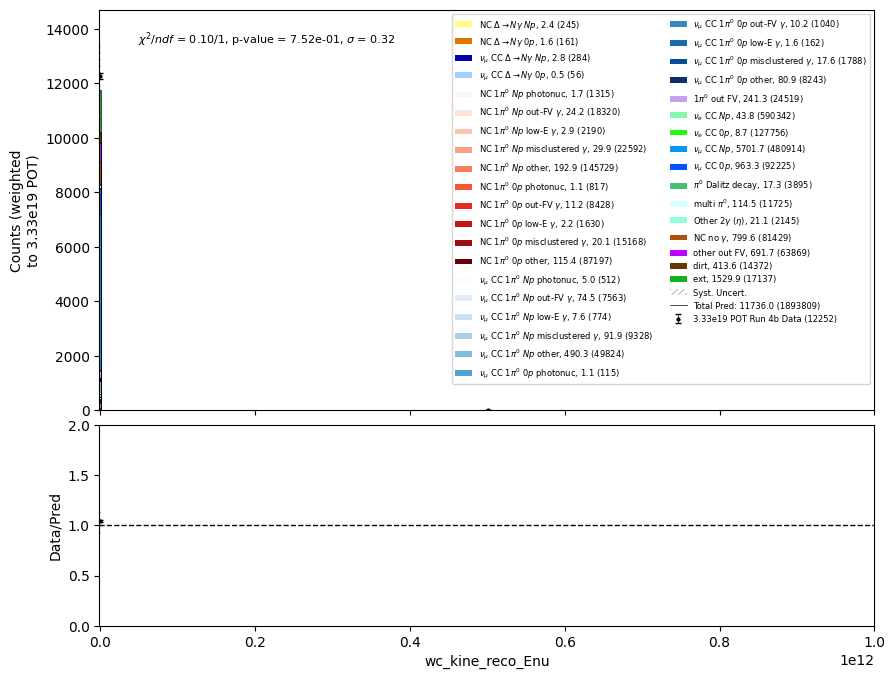

/nevis/houston/home/leehagaman/uboone_ngem/src/plot_helpers.py:350: RuntimeWarning: invalid value encountered in divide
  mc_stat_frac_errors = mc_stat_errors / pred_counts


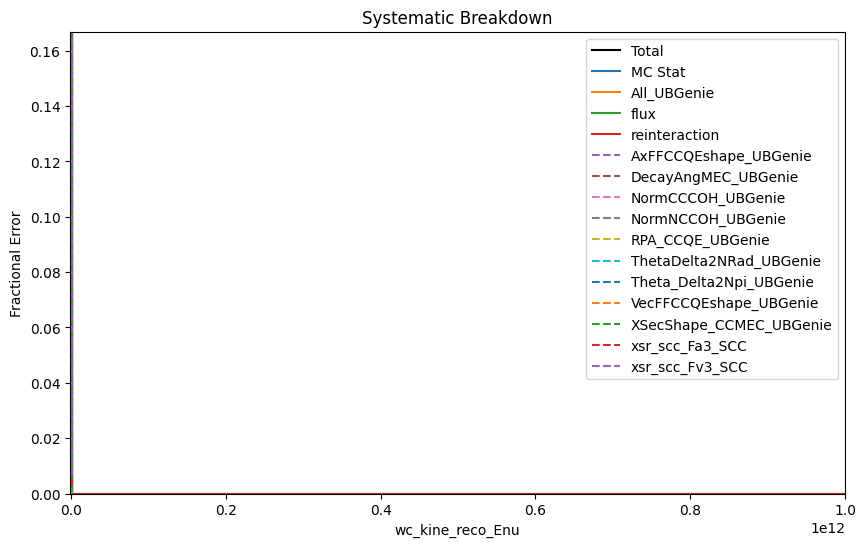

In [6]:
# hack to plot the legends without anything behind it
make_plot(pred_sel_df=pred_df, data_sel_df=data_df, 
        var='wc_kine_reco_Enu',
        dont_load_from_systematic_cache=True, plot_rw_systematics=True, include_systematic_breakdown=True, 
        include_legend=True, bins=np.array([-1e9, 1e9, 1e12]), include_overflow=False, include_underflow=False, log_x=False,
        savename="only_legend",
        weights_df=presel_weights_df)

In [7]:
all_p_value_info = []

#plot_vars = sorted(combined_training_vars)
plot_vars = sorted(["pandora_tksh_distance"])

with PdfPages("../plots/all_bdt_vars_open_data.pdf") as pdf:
    for i, var in tqdm(enumerate(plot_vars), total=len(plot_vars)):
        print("plotting", var)
        chi2, ndf, p_value, sigma, inverse_success = make_plot(pred_sel_df=pred_df, data_sel_df=data_df, 
                    var=var,
                    dont_load_from_systematic_cache=True, plot_rw_systematics=True, include_systematic_breakdown=False,
                    include_overflow=False, include_underflow=False,
                    include_legend=False, log_y=True, show=False, return_p_value_info=True,
                    page_num=i+1,
                    weights_df=presel_weights_df)
        all_p_value_info.append((chi2, ndf, p_value, sigma, inverse_success))
        pdf.savefig()
        plt.close()


  0%|          | 0/1 [00:00<?, ?it/s]

plotting pandora_tksh_distance
choosing bins automatically, min_val = -3.4028e+38, max_val = 3.2536e+09, min_reasonable_val = 0.0000e+00, max_reasonable_val = 5.2873e+07
choosing linear bins: [-9.9999998e-03  2.6436532e+06  5.2873065e+06  7.9309600e+06
  1.0574613e+07  1.3218266e+07  1.5861920e+07  1.8505572e+07
  2.1149226e+07  2.3792880e+07  2.6436532e+07  2.9080186e+07
  3.1723840e+07  3.4367492e+07  3.7011144e+07  3.9654800e+07
  4.2298452e+07  4.4942104e+07  4.7585760e+07  5.0229412e+07
  5.2873064e+07]
including overflow and underflow
display_bins: [-2.64365201e+06 -9.99999978e-03  2.64365325e+06  5.28730650e+06
  7.93096000e+06  1.05746130e+07  1.32182660e+07  1.58619200e+07
  1.85055720e+07  2.11492260e+07  2.37928800e+07  2.64365320e+07
  2.90801860e+07  3.17238400e+07  3.43674920e+07  3.70111440e+07
  3.96548000e+07  4.22984520e+07  4.49421040e+07  4.75857600e+07
  5.02294120e+07  5.28730640e+07  5.55167160e+07]
creating systematic covariance matrices...
merging mc_pred_df an

Creating reinteraction universe histograms: 100%|██████████| 1000/1000 [00:32<00:00, 31.00it/s]
Creating AxFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 85.19it/s]
Creating RPA_CCQE_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 87.38it/s]
Creating ThetaDelta2NRad_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 94.19it/s]
Creating Theta_Delta2Npi_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 83.45it/s]
Creating VecFFCCQEshape_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 91.92it/s]
Creating XSecShape_CCMEC_UBGenie universe histograms: 100%|██████████| 2/2 [00:00<00:00, 84.06it/s]
Creating xsr_scc_Fv3_SCC universe histograms: 100%|██████████| 10/10 [00:00<00:00, 57.35it/s]
/nevis/houston/home/leehagaman/uboone_ngem/src/plot_helpers.py:203: RuntimeWarning: invalid value encountered in divide
  tot_pred_frac_cov = tot_pred_cov / np.outer(pred_counts, pred_counts)


done getting reweightable systematic covariance matrices
removing bins with 0 or 1 data counts at indices: [ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [8]:
# save all_p_value_info to a pickle file
#with open("all_p_value_info.pkl", "wb") as f:
#    pickle.dump(all_p_value_info, f)

# load all_p_value_info from a pickle file
with open("all_p_value_info.pkl", "rb") as f:
    all_p_value_info = pickle.load(f)


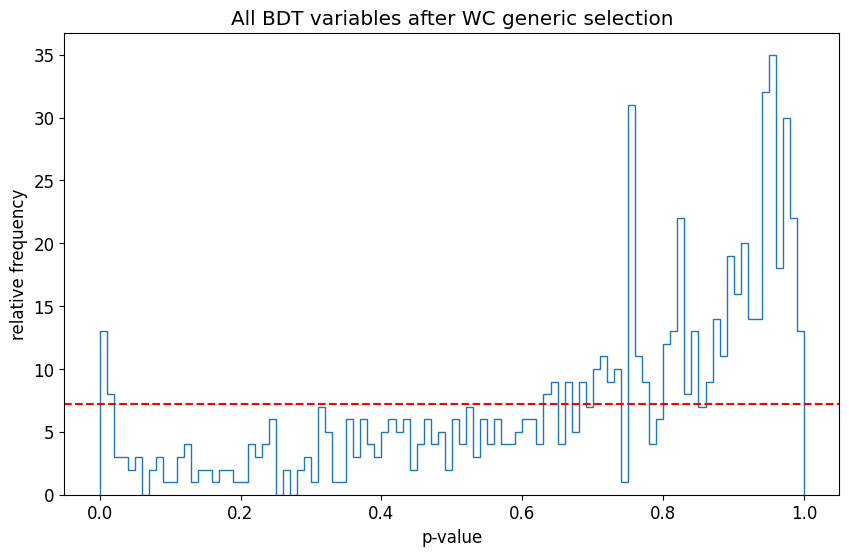

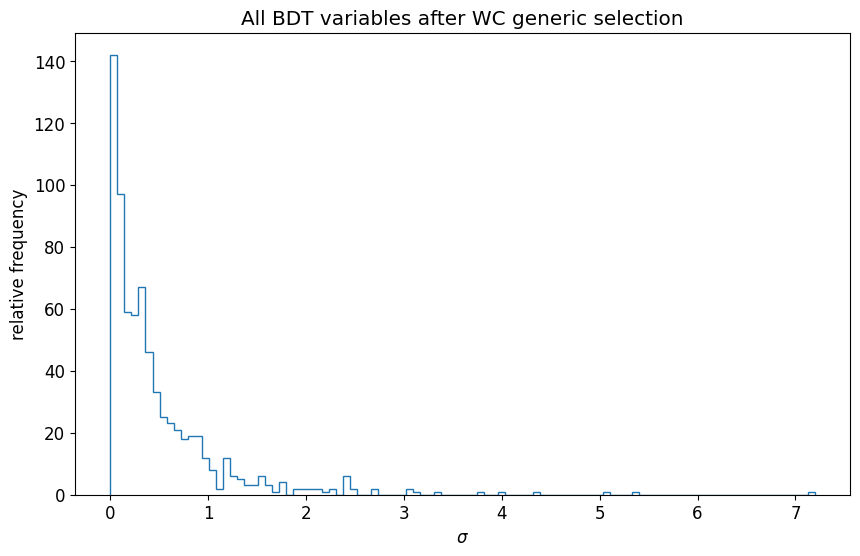

In [9]:
plt.rcParams.update({'font.size': 12})

all_p_values = [p_value for chi2, ndf, p_value, sigma, inverse_success in all_p_value_info]
all_sigmas = [sigma for chi2, ndf, p_value, sigma, inverse_success in all_p_value_info]

bins = np.linspace(0, 1, 101)
plt.figure(figsize=(10, 6))
plt.hist(all_p_values, bins=bins, histtype="step")
plt.axhline(y=len(all_p_values)/(len(bins)-1), color='red', linestyle='--', label="Expected")
plt.xlabel("p-value")
plt.ylabel("relative frequency")
plt.title("All BDT variables after WC generic selection")
plt.show()

bins = np.linspace(0, np.max(np.array(all_sigmas)[np.array(all_sigmas) < np.inf]), 101)
plt.figure(figsize=(10, 6))
plt.hist(all_sigmas, bins=bins, histtype="step")
plt.xlabel(r"$\sigma$")
plt.ylabel("relative frequency")
plt.title("All BDT variables after WC generic selection")
plt.show()


In [10]:
for i in range(len(all_p_value_info)):
    chi2, ndf, p_value, sigma, inverse_success = all_p_value_info[i]
    if sigma > 3:
        print(f"sigma = {sigma} for variable {sorted(plot_vars)[i]}")
    if not inverse_success:
        print(f"failed to invert for variable {sorted(plot_vars)[i]}")


IndexError: list index out of range